In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

MT = [1]
ET = []
J = 1
length = 100
max_temp = 1000
iterations = 100

In [14]:
def make_plot(title, xlab, ylab, plot):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(plot)
    plt.show()


In [15]:
Sp = [1 if random.random() < .5 else -1 for i in range(length)]

for i in range(1, max_temp):

    S = Sp.copy()
    E = sum([(-J * S[i] * S[i + 1]) for i in range(len(S[:-1]))])
    E += -J * S[0] * S[-1]
    avgE = []
    for j in range(iterations):

        nextS = np.ones(len(S))
        for k in range(len(S)):
            nextS[random.randint(0, len(S) - 1)] *= -1
        nextS = nextS * np.array(S)

        nextE = sum([(-J * nextS[i] * nextS[i + 1]) for i in range(len(nextS) - 1)])
        nextE += -J * nextS[0] * nextS[-1]

        if nextE < E:
            E = nextE
            S = nextS
        elif math.exp(-(nextE - E) / i) >= random.random():
            E = nextE
            S = nextS
        avgE.append(E)

    ET.append(np.mean(avgE))
    MT.append(np.mean(S))

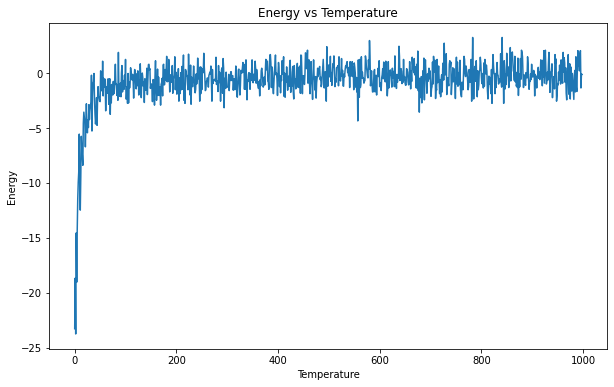

In [16]:
make_plot('Energy vs Temperature', 'Temperature', 'Energy', ET)


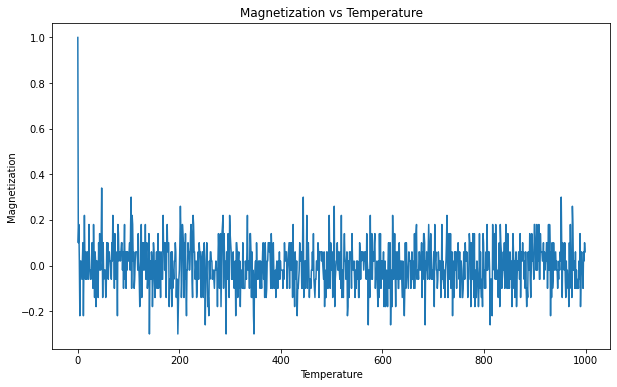

In [17]:
make_plot('Magnetization vs Temperature', 'Temperature', 'Magnetization', MT)